<a href="https://colab.research.google.com/github/kimhotac/kimhotac.github.io/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 로지스틱 회귀란?

* 분류 문제에 기본적인 알고리즘
* 지도 학습
* 불연속적인 집합으로 분류

기본적인 틀 자체는 선형 회귀와 같다. 단지 선형 회귀는 직선을 그어 가중치와 편차를 가깝게 학습해 간다면 로지스틱 회귀는 아래 보이는 로지스틱 곡선을 사용해 점점 가깝게 학습해 간다. 물론 계산과 내부 파라미터 등은 다르다. 한 선을 라벨링 된 데이터에 가까이 붙여 간다는 점이 비슷한 것이다.


단일선형회귀에서 사용하는 함수가 아래와 같다.

$\hat y = \theta_0 + x_1 \cdot \theta_1$

단일로지스틱 회귀에서 사용하는 함수는 아래와 같다.

$ \hat y = \dfrac{1}{1+\exp{(\theta_0 + x_1 \cdot \theta_1)}} $

##로지스틱 회귀를 알기 전에

로지스틱 함수(Logistic function)를 해석하려면 odd와 로짓 함수(logit function)의 개념이 필요하다.

어떤 한 사건이 0과 1로 일어난다고 가정 했을 때(=베르누이 분포)
* 1이 일어난 사건의 확률을 $P$
* 0이 일어난 사건의 확률은 $1-P$

$Odd=\dfrac{P}{1-P}$

$logit function =\log (\dfrac{P}{1-P}) \$


로짓 함수의 특징
* $0<P≤1$
* $-∞<Y<∞$

로짓 변환(logit transform)

$log(Odd) =log(\dfrac{\dfrac{1}{1+\exp{(\theta_0 + x_1 \cdot \theta_1)}}}{1-\dfrac{1}{1+\exp{(\theta_0 + x_1 \cdot \theta_1)}}})=log(\exp{(\theta_0 + x_1 \cdot \theta_1)})=\theta_0 + x_1 \cdot \theta_1$



아래는 로짓 함수를 0.01과 0.99사이의 값을 그래프로 구현한 것이다.

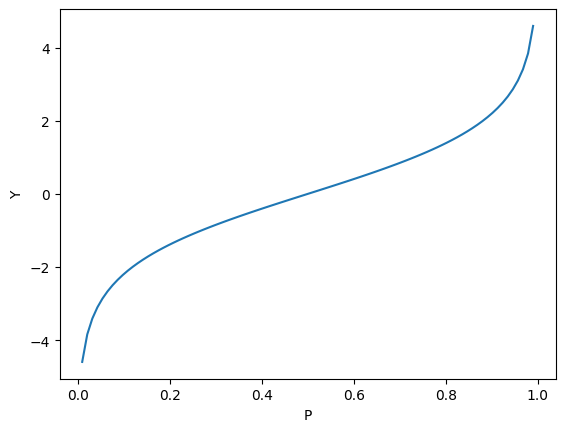

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.01, 0.99, 90)
plt.plot(x, np.log(x/(1-x)))
plt.xlabel("P")
plt.ylabel("Y")
plt.show()

아래는 로지스틱 함수를 구현해 본 것이다.

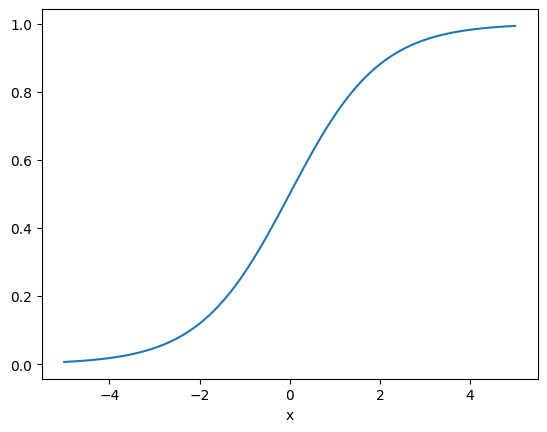

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 101)
plt.plot(x, 1/(1+np.exp(-x)))
plt.xlabel("x")
plt.show()

위의 그래프 두개를 비교해 보면 로지스틱 함수와 로짓 함수가 역함수 관계라는 것을 직관적으로 알 수 있다.

계산을 해보면 역함수 관계라는 것을 알 수 있다. 나름 재미있다.

#이 로지스틱 함수를 모델에 어떻게 적용했는가?



1. 머신러닝에서 사용하는 엄청난 스케일의 학습할 데이터중 특성을 일정한 구간으로 나눈다.
2. 구간에 해당하는 데이터를 '1'에 해당할 확률로 만든다.
3. 그러면 일정한 특성의 확률에서 급격하게 증가하는 부분이 생긴다. 그 부분에 편향과 가중치를 조정해 맞추어 가는 것이다.



위의 단일 로지스틱 함수와 비슷하게 다중 로지스틱 함수도 표현 가능하다.
$$ y = \dfrac{1}{1+\exp{(\theta_0 + x_1 \cdot \theta_1+x_2⋅\theta_2+⋅⋅⋅+x_n⋅\theta_n)}} $$
그러면 Odd와 로짓 함수도 간단하게 표현 할 수 있다.

$odd={\exp{(\theta_0 + x_1 \cdot \theta_1+x_2⋅\theta_2+⋅⋅⋅+x_n⋅\theta_n)}}$

$\log(odd)={{(\theta_0 + x_1 \cdot \theta_1+x_2⋅\theta_2+⋅⋅⋅+x_n⋅\theta_n)}}$

파라메타 추정법

* 로그-우도 함수(loglikelihood function)
* 로그 손실 함수(cross enrtopy)

로그-우도 함수는 최대화 할 수록 오차가 줄고

로그 손실은 최소화 할 수록 오차가 준다.


기준값

일반적으로 0.5이지만 보수적 결정이 필요 할 때 낮추어 사용한다.




아래는 1개의 특성만을 가지는 로지스틱 함수를 여러개의 값을 넣어 구현해 본 것이다.

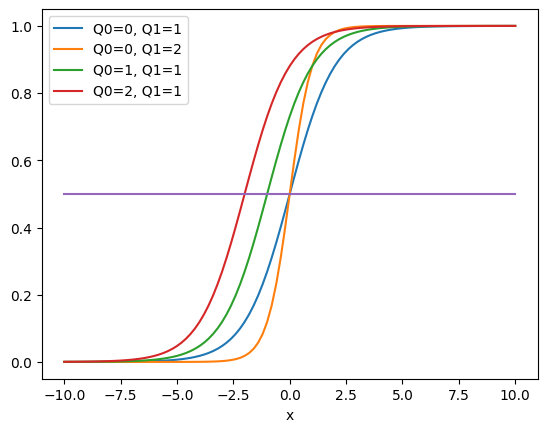

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 101)
plt.plot(x, 1/(1+np.exp(-0-1*x)),label='Q0=0, Q1=1')
plt.plot(x, 1/(1+np.exp(-0-2*x)),label='Q0=0, Q1=2')
plt.plot(x, 1/(1+np.exp(-1-1*x)),label='Q0=1, Q1=1')
plt.plot(x, 1/(1+np.exp(-2-1*x)),label='Q0=2, Q1=1')
plt.plot(x, 0.5+x*0)
plt.legend(loc=2)
plt.xlabel("x")
plt.show()